Before exercise with the real dataset, some preparation exercise might help.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f: plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [13]:
from sklearn import datasets
pointset1 = datasets.make_blobs(n_samples=1000, random_state=10, centers=4, cluster_std=1.2)[0]
pointset2 = datasets.make_moons(n_samples=1000, noise=.05)[0]

Text(0.5, 1.0, 'Dataset 2')

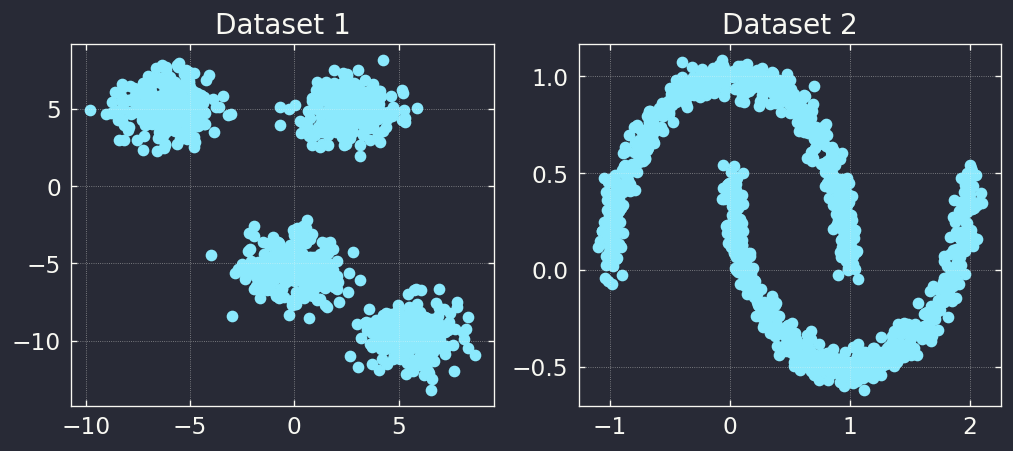

In [14]:
_, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].scatter(pointset1[:,0], pointset1[:,1])
axes[0].set_title('Dataset 1')
axes[1].scatter(pointset2[:,0], pointset2[:,1])
axes[1].set_title('Dataset 2')

## K-means method

1. 初期化
    - クラスタ数Kを決める
    - K個の重心をデータからランダムに選ぶ
2. 各点を，重心が最も近いクラスタに割り当てる
3. 各クラスタの重心を決める
4. 2,3を繰り返す
5. 重心の更新が epsilon 未満になったら終了


初期化は「各点にランダムにK個のラベルを振る」とすることも可能だが，クラスタへの割り当てを更新する際に，一部のクラスタが使われなくなる場合が多かった．

[K-means] 4 clusters obtained by 3 iterations


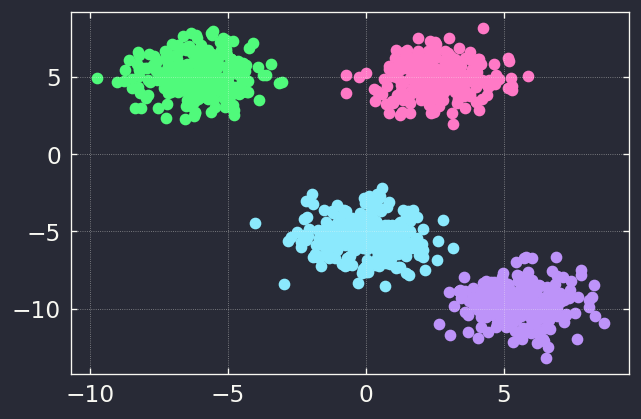

In [22]:
def euclid_distance(x, y):
    assert(len(x) == len(y))
    return np.sqrt(np.sum(np.float_power(x - y, 2)))

def kmeans_clustering(X, K=4, eps=1e-8, max_iter=50):
    N, D = X.shape

    # initialization
    labels = np.arange(N) % K

    # np.random.seed(12)
    old_centroids = np.copy(X[:K,:])
    centroids = np.copy(X[:K,:])

    for iter in range(max_iter):

        # calculate distances to centroids
        for i in range(N):
            distances = np.zeros(K)
            for k in range(K):
                distances[k] = euclid_distance(X[i,:], centroids[k,:])
            # update label to the nearest cluster
            labels[i] = np.argmin(distances)
        
        # calculate centroid of each cluster
        for k in range(K):
            centroids[k,:] = np.mean(X[np.where(labels == k),:][0], axis=0)

        # check convergence
        diff = 0
        for k in range(K):
            diff += euclid_distance(centroids[k,:], old_centroids[k,:])
        if (diff < eps): 
            print(f'[K-means] {K} clusters obtained by {iter} iterations')
            break
        old_centroids = np.copy(centroids)
    
    return labels

def plot_clusters(X, labels, ax=None):
    if not ax:
        _, ax = plt.subplots() 
    for k in sorted(np.unique(labels)):
        cluster = X[np.where(labels == k),:][0]
        ax.scatter(cluster[:,0], cluster[:,1])


labels1 = kmeans_clustering(pointset1, K=4)
plot_clusters(pointset1, labels1)

## Elbow method

$$Loss_k = \sum_{k=1}^K \sum_{i\in C_k} (x_i - r_k)^2$$

[K-means] 1 clusters obtained by 1 iterations
[K-means] 2 clusters obtained by 2 iterations
[K-means] 3 clusters obtained by 3 iterations
[K-means] 4 clusters obtained by 3 iterations
[K-means] 5 clusters obtained by 10 iterations
[K-means] 6 clusters obtained by 10 iterations
[K-means] 7 clusters obtained by 27 iterations
[K-means] 8 clusters obtained by 27 iterations
[K-means] 9 clusters obtained by 27 iterations
[K-means] 10 clusters obtained by 20 iterations



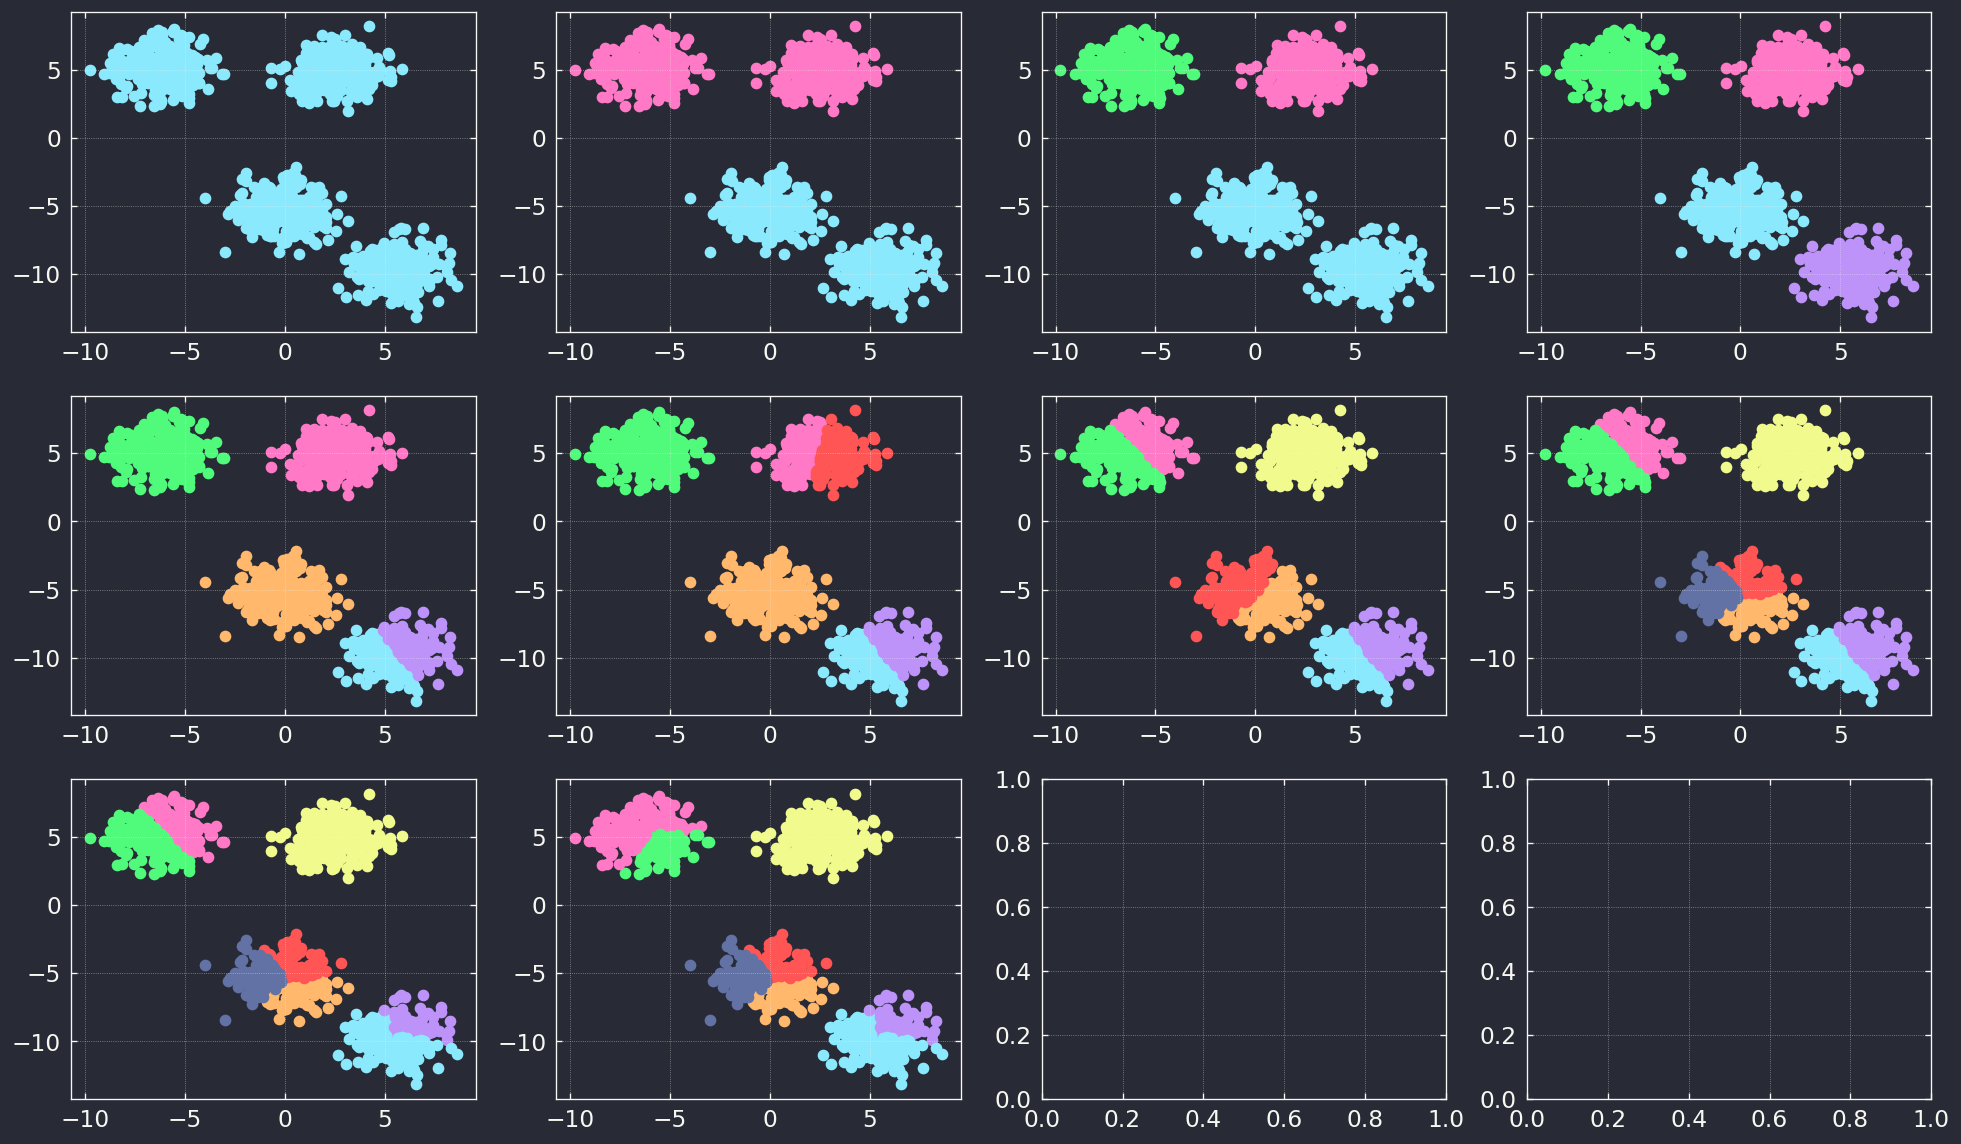

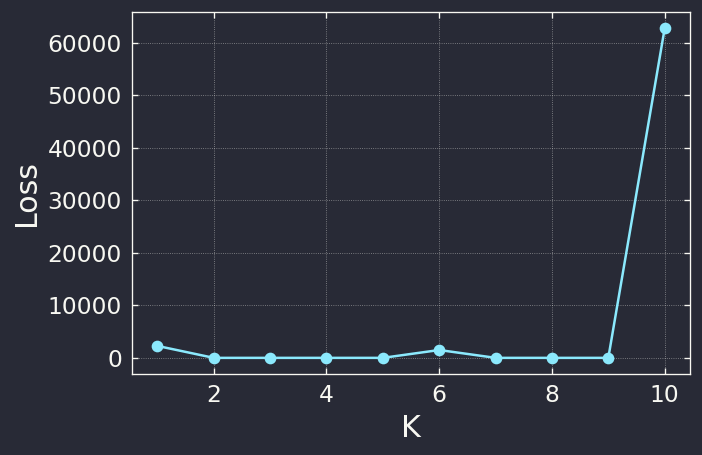

In [25]:
def squared_euclid_distance(x, y):
    assert(len(x) == len(y))
    return np.sum(np.float_power(x - y, 2))

def elbow(X, K_max=10):
    N, D = X.shape

    _ , axes = plt.subplots(3,4,figsize=(20,12))
    axes = axes.flatten()

    losses = np.zeros(K_max)
    for K in trange(1,K_max+1):
        labels = kmeans_clustering(X, K)
        counts = np.zeros(K)
        centroids = np.zeros((K,D))
        plot_clusters(X, labels, ax=axes[K-1])
        # calculate centroid of each cluster
        for k in range(K):
            cluster = X[np.where(labels == k),:][0]
            counts[k] = len(cluster)
            centroids[k,:] = np.mean(cluster, axis=0)
        loss = 0
        for i in range(N):
            k = labels[i]
            loss += squared_euclid_distance(X[i,:], centroids[k,:])
        losses[k-1] = loss
    return losses

def plot_elbow(losses):
    K_max = len(losses)
    plt.figure()
    plt.plot(range(1,K_max+1), losses, marker='o')
    plt.xlabel('K')
    plt.ylabel('Loss')
    # plt.yscale('log')

losses = elbow(pointset1, K_max=10)
plot_elbow(losses)

[K-means] 1 clusters obtained by 1 iterations
[K-means] 2 clusters obtained by 10 iterations
[K-means] 3 clusters obtained by 21 iterations
[K-means] 4 clusters obtained by 17 iterations
[K-means] 5 clusters obtained by 15 iterations
[K-means] 6 clusters obtained by 19 iterations
[K-means] 7 clusters obtained by 10 iterations
[K-means] 8 clusters obtained by 10 iterations
[K-means] 9 clusters obtained by 11 iterations
[K-means] 10 clusters obtained by 10 iterations



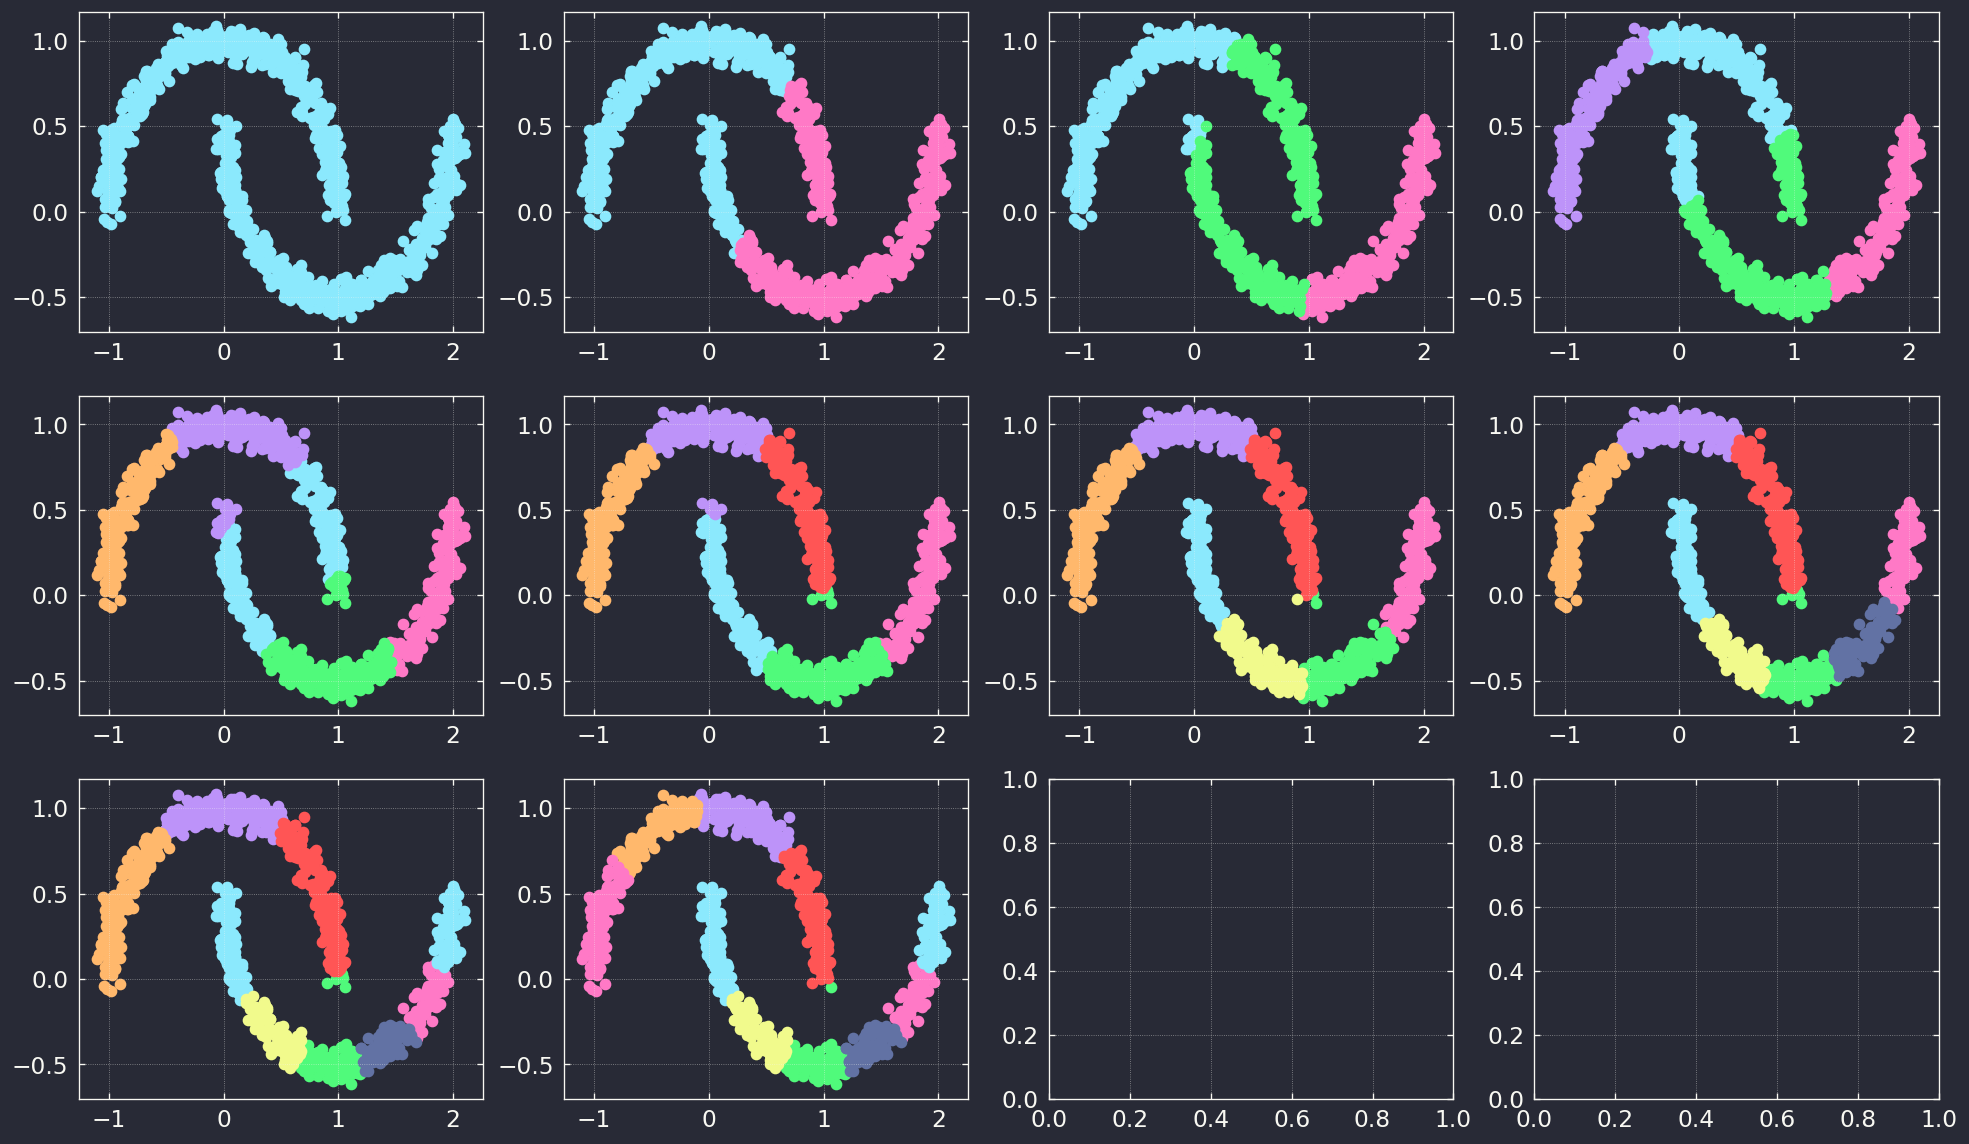

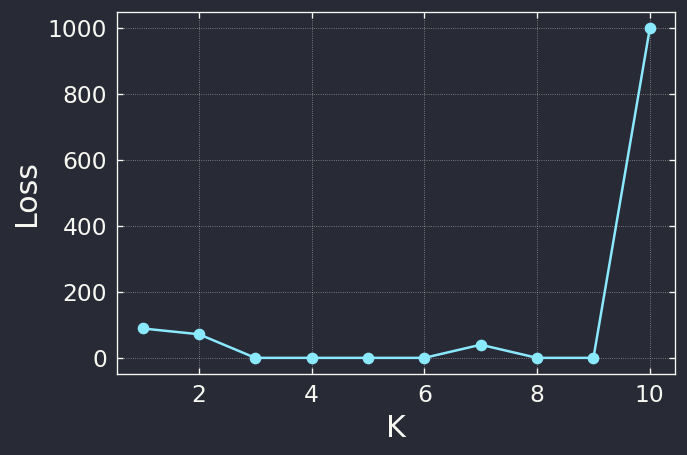

In [26]:
losses = elbow(pointset2, K_max=10)
plot_elbow(losses)